In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds = pd.read_csv('.../train.csv')
ds.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Lets do  Exploratory Data Analysis 

         We produced a heat map of the correlation between the different variables and the prices.
         We then, remove the features that are least important.

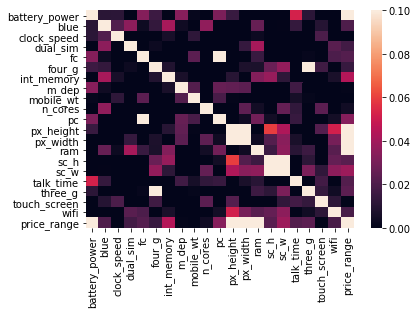

In [3]:
plt.figure()
sns.heatmap(ds.corr(),-0.0,0.1)

In [4]:
cols_to_drop = [
    'clock_speed',
    'm_dep',
    'mobile_wt',
    'touch_screen'
]
df = ds.drop(cols_to_drop,axis=1)

In [5]:

Y = df[['price_range']]
X = df[list(df.drop('price_range',axis=1))]
    #['battery_power','blue','dual_sim','fc','four_g','int_memory','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi']]
    
print X.shape, Y.shape

(2000, 16) (2000, 1)


# Lets use random forest classifier
             spliting the training data into 2 part to check accuracy of my random forest classifier.
             I use 250 trees as my n_extimator

In [7]:
import sklearn
from sklearn.ensemble import RandomForestClassifier


In [9]:
rf = RandomForestClassifier(n_estimators = 250,criterion = 'entropy')
rf.fit(X[:1800],Y[:1800])
rf.score(X[1800:],Y[1800:])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.92

In [10]:
print rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [11]:
test = pd.read_csv('/home/madhur/Desktop/hackathon/MobilePriceClassification/test.csv')
testX = test.drop('id',axis=1)
cols_to_drop = [
    'clock_speed',
    'm_dep',
    'mobile_wt',
    'touch_screen',
]
testX = testX.drop(cols_to_drop,axis=1)
rf.fit(X,Y)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
prediction = rf.predict(testX)


#  storing my prediction into csv format using pandas. 

 indexing by default starts from 0. 
 index is an object of the dataframe.
 I increment it by 1.
 
 dumping the dataframe into csv format using to_csv function

In [13]:
p = pd.DataFrame(prediction)
p.index +=1
p.to_csv("/home/madhur/Desktop/hackathon/result.csv",header = ['price_range'],index = True,index_label='id')
